Andrej Karpathy- Recipe To Train NNs
http://karpathy.github.io/2019/04/25/recipe/


I) Become One With Data:

  Questions To Answer:

  1) Average Poolings vs Max Pooling ? - Relation To Spatial Position?
  Average Pooling Is Better I Feel - All Regions Contribute To The Squeezed Matric Instead of Only The Maximum values





#Mount Drive, Imports

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
#imports
import os
from os import listdir
from os import mkdir
from os.path import join
import pandas as pd
import numpy as np
from PIL import Image
from shutil import copy2
from math import floor
import matplotlib.pyplot as plt

#Prepare Train and Test Data Folders

In [ ]:
#Unzip the input file to see how many images it has
!unzip /content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/input_raw.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/input/cookie325.jpg  
  inflating: /content/input/cookie3250.jpg  
  inflating: /content/input/cookie3255.jpg  
  inflating: /content/input/cookie3260.jpg  
  inflating: /content/input/cookie3265.jpg  
  inflating: /content/input/cookie3270.jpg  
  inflating: /content/input/cookie3275.jpg  
  inflating: /content/input/cookie3280.jpg  
  inflating: /content/input/cookie3285.jpg  
  inflating: /content/input/cookie3290.jpg  
  inflating: /content/input/cookie3295.jpg  
  inflating: /content/input/cookie330.jpg  
  inflating: /content/input/cookie3300.jpg  
  inflating: /content/input/cookie3305.jpg  
  inflating: /content/input/cookie3310.jpg  
  inflating: /content/input/cookie3315.jpg  
  inflating: /content/input/cookie3320.jpg  
  inflating: /content/input/cookie3325.jpg  
  inflating: /content/input/cookie3330.jpg  
  inflating: /content/input/cookie3335.jpg  
  inflating: /content/input/cookie3340.jpg  
  infl

In [ ]:
#Number of Images in the folder.
fp = '/content/input'
print( len(listdir(fp)), 'files')

12455 files


In [ ]:
# !mv /content/content/output /content
# !rm -r /content/content

#for the raw file
# !rm -r /content/output

In [ ]:
#make a copy of the train.csv and lbel.csv files
!cp /content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/train.csv /content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/label.csv /content

In [ ]:
#get class names from the label.csv
df = pd.read_csv('label.csv')

In [ ]:
classes = list(df['class'])
classes

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Blackberries',
 'Black_Grapes',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
#Create Train and Test Directory Structures. With subdirectories based on the class names.

trp = '/content/Train'
tep = '/content/Test'

mkdir(trp)
#create subdirectories in train dir for the class names
for c in classes:
  p = join(trp, c)
  mkdir(p)

mkdir(tep)
#create subdirectories in train dir for the class names
for c in classes:
  p = join(tep, c)
  mkdir(p)

In [ ]:
#exploring the data

#images per class

td = pd.read_csv('/content/train.csv')
print(td.groupby('label').count())
print('\n')
print('no. of images - according to train.csv:')
print(td.groupby('label').count().sum())

       image_id
label          
0          1000
1           950
2          1000
3           542
4           837
5           562
6          1000
7           811
8           723
9           598
10          686
11          831
12         1000
13          898
14         1017


no. of images - according to train.csv:
image_id    12455
dtype: int64


In [ ]:
#Check Image Resolutiond

# img = Image.open('/content/input/0002f5b84a708bd3.jpg')
# w, h  = img.size
# 
# print(str(w) + "x" + str(h))

In [ ]:
td

,image_id,label
0,Apple_pie_0001.jpg.jpg,0
1,Apple_pie_0002.jpg.jpg,0
2,Apple_pie_0003.jpg.jpg,0
3,Apple_pie_0004.jpg.jpg,0
4,Apple_pie_0005.jpg.jpg,0
...,...,...
12450,White_Rice86.jpg.jpg,14
12451,White_Rice87.jpg.jpg,14
12452,White_Rice9.jpg.jpg,14
12453,White_Rice93.jpg.jpg,14


In [ ]:
#Edit the train.csv file -remove the .jpg thing, or add it to the file

tdr = td.copy(deep=True)

def remove_jgp_ext(fn):
  l = fn.split('.')
  l.pop()
  return '.'.join(l)

tdr['image_id'] = tdr['image_id'].apply(remove_jgp_ext)
tdr

,image_id,label
0,Apple_pie_0001.jpg,0
1,Apple_pie_0002.jpg,0
2,Apple_pie_0003.jpg,0
3,Apple_pie_0004.jpg,0
4,Apple_pie_0005.jpg,0
...,...,...
12450,White_Rice86.jpg,14
12451,White_Rice87.jpg,14
12452,White_Rice9.jpg,14
12453,White_Rice93.jpg,14


In [ ]:
#Create Staging Dat Directory With The Class Folders
dp = '/content/Data'

mkdir(dp)
#create subdirectories in train dir for the class names
for c in classes:
  p = join(dp, c)
  mkdir(p)

  

In [ ]:

classes

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Blackberries',
 'Black_Grapes',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
#Move the images from input to the respective folders
def cg_images(row):
  '''
    copy images in join merged folder to the resective data class subdirectory absed on the label in the csv file
    Rn , the source, dest dirs and classes are hardcoded
  '''
  src = '/content/input'
  dst = '/content/Data'
  img = row.image_id
  label = row.label
  img_p = join(src,img)
  dst_p = join(dst, classes[label])
  print(img, label, img_p, dst_p)
  copy2(img_p, dst_p)

tdr.apply(cg_images, axis=1)

Streaming output truncated to the last 5000 lines.
0bf860afe840a9d1.jpg 9 /content/input/0bf860afe840a9d1.jpg /content/Data/French_Fries
0c2b324207448f58.jpg 9 /content/input/0c2b324207448f58.jpg /content/Data/French_Fries
0c4dedaf3a1271a6.jpg 9 /content/input/0c4dedaf3a1271a6.jpg /content/Data/French_Fries
0c9a465f9510b17b.jpg 9 /content/input/0c9a465f9510b17b.jpg /content/Data/French_Fries
0d2e165ca82633f0.jpg 9 /content/input/0d2e165ca82633f0.jpg /content/Data/French_Fries
0d54fb3162a098e5.jpg 9 /content/input/0d54fb3162a098e5.jpg /content/Data/French_Fries
0dc33406381294cc.jpg 9 /content/input/0dc33406381294cc.jpg /content/Data/French_Fries
0dcdde9142432048.jpg 9 /content/input/0dcdde9142432048.jpg /content/Data/French_Fries
0ed836fe324a5816.jpg 9 /content/input/0ed836fe324a5816.jpg /content/Data/French_Fries
0f6cb5c85832cb5b.jpg 9 /content/input/0f6cb5c85832cb5b.jpg /content/Data/French_Fries
0f7eca19472a6479.jpg 9 /content/input/0f7eca19472a6479.jpg /content/Data/French_Fries
102

0        None
1        None
2        None
3        None
4        None
         ... 
12450    None
12451    None
12452    None
12453    None
12454    None
Length: 12455, dtype: object

In [ ]:
#Very Little Data
!rm -r /content/input 

In [ ]:
a = '/content/Data'
l = listdir(a)
l.sort()
for i in l:
  print(len(listdir(join(a,i))))
print(td.groupby('label').count())


1000
950
1000
837
542
562
1000
811
723
598
686
831
1000
898
1017
       image_id
label          
0          1000
1           950
2          1000
3           542
4           837
5           562
6          1000
7           811
8           723
9           598
10          686
11          831
12         1000
13          898
14         1017


In [ ]:
#Train Test Split Images For Each Class Using Previous Code
def copy_images_to_train(src_fop, dst_fop, dst_fop2, percentage):
    # images_copied = 0
    images_list = os.listdir(src_fop)
    no = floor(len(images_list)*percentage/100)
    count = 0
    for image in images_list:
        if count<no:
            copy2(join(src_fop, image), join(dst_fop, image))
            count += 1
        # else: break
        else: 
            copy2(join(src_fop, image), join(dst_fop2,image))

a = '/content/Data'
tr = '/content/Train'
te = '/content/Test'
# percentage = 80
percentage = 90 #Trial 2 DenseNet201
for c in classes:
  src_fop = join(a,c)
  dst_fop = join(tr,c)
  dst_fop2 = join(te,c)
  copy_images_to_train(src_fop, dst_fop, dst_fop2, percentage)




In [ ]:
print('Class', 'Data', 'Train', 'Test')
a = '/content/Data'
la = listdir(a)
la.sort()

b = '/content/Train'
lb = listdir(a)
lb.sort()

c = '/content/Test'
lc = listdir(a)
lc.sort()
for x,y,z in zip(la,lb,lc):
  print(x, len(listdir(join(a,x))), len(listdir(join(b,y))), len(listdir(join(c,z))) )

Class Data Train Test
Apple_Pie 1000 900 100
Bagel_With_Cream_Cheese 950 855 95
Banana 1000 900 100
Black_Grapes 837 753 84
Blackberries 542 487 55
Chicken_Breast 562 505 57
Chicken_Burrito_Bowl 1000 900 100
Cookie 811 729 82
Energy_Bars 723 650 73
French_Fries 598 538 60
Fruit_Flavored_Yogurts 686 617 69
Pasta 831 747 84
Toasted_Bagel_With_Butter 1000 900 100
Toasted_Bread 898 808 90
White_Rice 1017 915 102


#Base Line - Data Gen + Model + Train

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [ ]:
#Model Architecture and Preprocess Input Function

import tensorflow
from tensorflow.keras.applications import MobileNetV3Large
# from tensorflow.keras.applications import MobileNetV3Small
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import EfficientNetB0

#Import Preprocess Input Function
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input


# base_model=MobileNetV3Large(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNetV3Large(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3


# preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=0.1
    #zoom 0.5   #Bad
    # ,horizontal_flip=True #Bad
    # ,brightness_range=[0.9,1.1] #Feels Useless
    # ,width_shift_range=0.2
    # ,height_shift_range=0.2

    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=45
    # ,channel_shift_range = 50
    # ,zca_whitening=True #Useless



    # ,rescale=1/255


  

    #
        # ,rotation_range=30,
        # shear_range=0.3,
        # horizontal_flip=True,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=0.25
                                 ) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 11204 images belonging to 15 classes.


In [ ]:
# validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255) #included in our dependencies
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
validation_generator=train_datagen.flow_from_directory('/content/Test',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)



Found 1251 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_T2_Aug{epoch}_{val_accuracy}.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
# checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early = EarlyStopping(monitor='val_accuracy', patience=7)
# early = EarlyStopping(monitor='val_acc', patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

e = 30
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    
                    validation_data = validation_generator,
                    callbacks = callbacks_list,
          
                   epochs=e)

In [ ]:
#Results After Vanilla Baseline - 79% Val Accuracy - 90+ Train Accuracy.

#Baseline w/Augmentation

In [ ]:
#Model Architecture and Preprocess Input Function

import tensorflow
from tensorflow.keras.applications import MobileNetV3Large
# from tensorflow.keras.applications import MobileNetV3Small
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import EfficientNetB0

#Import Preprocess Input Function
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input


base_model=MobileNetV3Large(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3

###Highly Experimental - Adding A Dropout Layer.
x = Dropout(0.8)(x)

# preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=0.1
    #zoom 0.5   #Bad
    # ,horizontal_flip=True #Bad
    # ,brightness_range=[0.9,1.1] #Feels Useless
    ,width_shift_range=0.2
    ,height_shift_range=0.2

    ,rotation_range=90
    ,zoom_range=0.25
    ,shear_range=45
    ,channel_shift_range = 50
    # ,zca_whitening=True #Useless



    # ,rescale=1/255


  

    #
        # ,rotation_range=30,
        # shear_range=0.3,
        # horizontal_flip=True,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=0.25
                                 ) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 11204 images belonging to 15 classes.


In [ ]:
##View IMages
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()
# augmented_images = [train_generator[0][0][3] for i in range(5)]
# plotImages(augmented_images)

In [ ]:

validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
validation_generator=train_datagen.flow_from_directory('/content/Test',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)



Found 1251 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_T3_Aug_Dropout{epoch}_{val_accuracy}.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
# checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early = EarlyStopping(monitor='val_accuracy', patience=7)
# early = EarlyStopping(monitor='val_acc', patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug13_0.7649880051612854.h5')
model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.8713029623031616.h5')

In [ ]:
#T1 -76%
#T2 - 86%
#T3 - lr = 0.00001
#T4 - Dropout (0.8), 0.0001
model.trainable = True

opti = tensorflow.keras.optimizers.Adam(
    # learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    # learning_rate=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

e = 30
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    
                    validation_data = validation_generator,
                    callbacks = callbacks_list,
          
                   epochs=e)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
117/350 [=========>....................] - ETA: 2:28 - loss: 0.6652 - accuracy: 0.7889

KeyboardInterrupt: ignored

In [ ]:
# Aug T3 
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

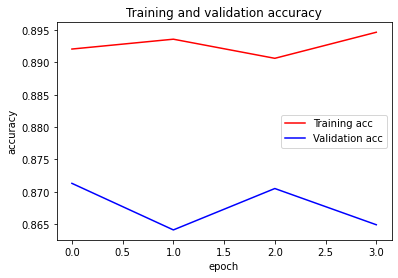

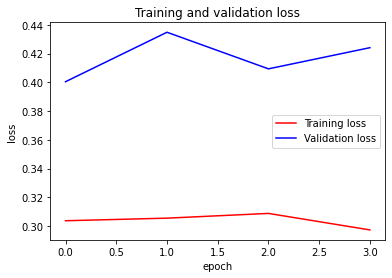

In [ ]:
# # Aug T3 
# #Graphing our training and validation
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))
# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.ylabel('accuracy') 
# plt.xlabel('epoch')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.ylabel('loss') 
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

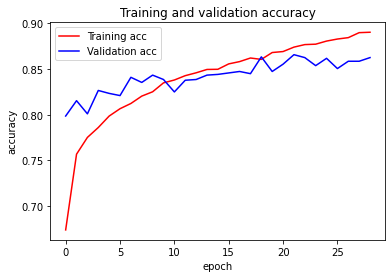

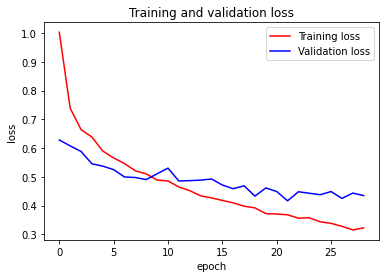

In [ ]:
# # Aug T2 
# #Graphing our training and validation
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))
# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.ylabel('accuracy') 
# plt.xlabel('epoch')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.ylabel('loss') 
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

#Model Experiments Without Data Augmentation

In [ ]:
#Data Loaders
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=0.1
    #zoom 0.5   #Bad
    # ,horizontal_flip=True #Bad
    # ,brightness_range=[0.9,1.1] #Feels Useless
    # ,width_shift_range=0.2
    # ,height_shift_range=0.2

    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=45
    # ,channel_shift_range = 50
    # ,zca_whitening=True #Useless



    # ,rescale=1/255


  

    #
        # ,rotation_range=30,
        # shear_range=0.3,
        # horizontal_flip=True,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=0.25
                                 ) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


#val

# validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255) #included in our dependencies
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
validation_generator=train_datagen.flow_from_directory('/content/Test',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)



Found 11204 images belonging to 15 classes.
Found 1251 images belonging to 15 classes.


##Simple 1 - Just The Final Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [ ]:
#Model Architecture and Preprocess Input Function

import tensorflow
from tensorflow.keras.applications import MobileNetV3Large
# from tensorflow.keras.applications import MobileNetV3Small
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import EfficientNetB0

#Import Preprocess Input Function
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input


base_model=MobileNetV3Large(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
# preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)


17612800/17605208 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_S1{epoch}_{val_accuracy}.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
# checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early = EarlyStopping(monitor='val_accuracy', patience=3)
# early = EarlyStopping(monitor='val_acc', patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

e = 30
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    
                    validation_data = validation_generator,
                    callbacks = callbacks_list,
          
                   epochs=e)

#Model Improvements With Data Augmentation - Learning Rate Experiments

In [ ]:
#Learning Rate Test
try:
    import tensorflow.keras as keras
    import tensorflow.keras.backend as K
except:
    import keras
    import keras.backend as K
import numpy as np
import os
import matplotlib.pyplot as plt
# from .utils import moving_window_avg

def moving_window_avg(x, window=5):
    """
    Return a moving-window average.
    :param x: a numpy array
    :param window: an integer, number of data points for window size.
    """
    return pd.DataFrame(x).rolling(window=window, min_periods=1).mean().values.squeeze()

class LrRangeTest(keras.callbacks.Callback):
    """
    A callback class for finding a learning rate.
    :param lr_range: a tuple of lower and upper bounds of learning rate.
    :param wd_list: a list of weight decay to perform grid search.
    :param steps: a number of steps for learning rates in a range test.
    :param batches_per_step: a number of batches to average loss for each learning rate step.
    :param threshold_multiplier: a multiplier to lowest encountered training loss to determine early termination of range test.
    :param validation_data: either (x_test, y_test) or a generator. Useful for wd grid search.
    :param validation_batch_size: a batch size when evaluating validation loss.
    :param batches_per_val: a number of batches to use in averaging validation loss.
    :param verbose: True or False whether to print out progress detail.
    """

    def __init__(self,
                 lr_range=(1e-5, 10),
                 wd_list=[],
                 steps=100,
                 batches_per_step=5,
                 threshold_multiplier=5,
                 validation_data=None,
                 validation_batch_size=16,
                 batches_per_val=10,
                 verbose=False):

        super(LrRangeTest, self).__init__()

        self.lr_range = lr_range

        self.wd_list = wd_list

        self.steps = steps
        self.batches_per_step = batches_per_step
        self.early_stop = False
        self.threshold_multiplier = threshold_multiplier
        self.validation_data = validation_data
        if validation_data is not None:
            self.use_validation = True
        else:
            self.use_validation = False
        self.validation_batch_size = validation_batch_size
        self.batches_per_val = batches_per_val
        self.verbose = verbose

        # generate a range of learning rates
        self.lr_values = np.power(10.0,
                                  np.linspace(np.log10(lr_range[0]), np.log10(lr_range[1]), self.steps))

        # logs initialization
        self.lr = self.lr_values
        n_wd = len(self.wd_list) if len(self.wd_list) > 0 else 1
        self.loss = np.zeros(shape=(self.lr_values.size, n_wd)) * np.nan
        if self.use_validation:
            self.val_loss = np.zeros_like(self.loss) * np.nan

        # non-reset counters
        self.current_wd = 0
        self.model_org = []

        # reset counters
        self.current_batches_per_step = 0
        self.current_loss_val = 0

    def _fetch_val_batch(self, batch):
        if isinstance(self.validation_data, (tuple,)):
            batch_size = self.validation_batch_size
            x = self.validation_data[0][batch * batch_size:(batch + 1) * batch_size]
            y = self.validation_data[1][batch * batch_size:(batch + 1) * batch_size]
            return x, y
        if isinstance(self.validation_data, (keras.utils.Sequence,)):
            return self.validation_data.__getitem__(batch)

    def _reset(self):
        """
        Reset counters, prepare for a new weight decay value.
        """
        self.model.optimizer.set_weights(self.model_org.optimizer.get_weights())
        self.model.set_weights(self.model_org.get_weights())
        self.current_step = 0
        self.current_batches_per_step = 0
        self.current_loss_val = 0
        self.best_loss = np.inf
        self.early_stop = False

    def on_train_begin(self, logs={}):
        # save current model for reset
        self.model.save("lr_range_test_original_stage.h5")
        self.model_org = keras.models.load_model("lr_range_test_original_stage.h5")
        # handle empty input wd_list
        if len(self.wd_list) == 0:
            self.wd_list = [K.get_value(self.model.optimizer.decay)]
        self.current_wd = 0
        self._reset()

    def on_train_batch_begin(self, batch, logs):
        K.set_value(self.model.optimizer.lr, self.lr_values[self.current_step])
        K.set_value(self.model.optimizer.decay, self.wd_list[self.current_wd])

    def on_train_batch_end(self, batch, logs):

        self.current_loss_val += logs['loss']
        self.current_batches_per_step += 1

        if self.current_batches_per_step == self.batches_per_step:

            self.loss[self.current_step, self.current_wd] = self.current_loss_val / self.batches_per_step

            if self.use_validation:
                # calculate for validation set
                self.current_loss_val = 0.0
                if isinstance(self.validation_data, tuple):
                    batch_size = self.validation_batch_size
                    N = int(np.ceil(self.validation_data[0].shape[0] / batch_size))
                if isinstance(self.validation_data, keras.utils.Sequence):
                    N = len(self.validation_data)
                n_batch = min(self.batches_per_val, N)
                for i in range(n_batch):
                    data_batch = self._fetch_val_batch(i)
                    batch_size = data_batch[0].shape[0]
                    result = self.model.evaluate(x=data_batch[0], y=data_batch[1],
                                                 batch_size=batch_size,
                                                 verbose=False)
                    self.current_loss_val += result[0]

                self.val_loss[self.current_step, self.current_wd] = self.current_loss_val / n_batch

            # verbose
            if self.verbose:
                if not self.use_validation:
                    print("wd={:.2e}".format(self.wd_list[self.current_wd]), ",",
                          "lr={:.2e}".format(self.lr_values[self.current_step]), ",",
                          "loss={:.2e}".format(self.loss[self.current_step - 1, self.current_wd]))
                if self.use_validation:
                    print("wd={:.2e}".format(self.wd_list[self.current_wd]), ",",
                          "lr={:.2e}".format(self.lr_values[self.current_step]), ",",
                          "loss={:.2e}".format(self.loss[self.current_step - 1, self.current_wd]), ",",
                          "val_loss={:.2e}".format(self.val_loss[self.current_step - 1, self.current_wd]))

            self.current_batches_per_step = 0
            self.current_loss_val = 0.0
            self.current_step += 1

            # update best loss
            if not self.use_validation:
                latest_loss = self.loss[self.current_step - 1, self.current_wd]
            else:
                latest_loss = self.val_loss[self.current_step - 1, self.current_wd]

            self.best_loss = self.best_loss if self.best_loss < latest_loss else latest_loss

            # determine earlystop
            if latest_loss > self.best_loss * self.threshold_multiplier:
                self.early_stop = True

        # consider next wd value
        if self.current_step == self.lr_values.size or self.early_stop:
            self.current_wd += 1
            self._reset()

        # stop training when done with all weight decays, set everything back to before lr range test.
        if self.current_wd == len(list(self.wd_list)):
            self.model.set_weights(self.model_org.get_weights())
            K.set_value(self.model.optimizer.lr,
                        K.get_value(self.model_org.optimizer.lr))
            self.model.optimizer.set_weights(self.model_org.optimizer.get_weights())
            self.model.stop_training = True
            try:
                os.remove("lr_range_test_original_stage.h5")
            except:
                pass

    def find_n_epoch(self, dataset, batch_size=None):
        """
        A method to find a number of epochs to train in the sweep.
        :param dataset: If the training data is an ndarray (used with model.fit), ``dataset`` is the x_train. If the training data is a generator (used with model.fit_generator), ``dataset`` is the generator instance.
        :param batch_size: Needed only if ``dataset`` is x_train.
        :return epochs: a number of epochs needed to do a learning rate sweep.
        """
        n_wd = len(self.wd_list) if len(self.wd_list) > 0 else 1
        if isinstance(dataset, keras.utils.Sequence):
            return int(np.ceil(self.steps * self.batches_per_step / len(dataset)) * n_wd)
        if isinstance(dataset, np.ndarray):
            if batch_size is None:
                raise ValueError("``batch_size`` must be provided.")
            else:
                return int(np.ceil(self.steps * self.batches_per_step /
                                   (dataset.shape[0] / batch_size)) * n_wd)

    def plot(self, set='train', x_scale="log", y_scale="linear", ma=True, window=5, **kwargs):
        """
        Plot the lr range test result.
        :param set: either "train" or "valid". If 'valid', ``validation_data`` must not be ``None``.
        :param x_scale: scale for the x axis, either "log" or "linear".
        :param y_scale: scale for the y axis, either "log" or "linear".
        :param ma: True or False to use moving windonw average.
        :param window: an integer for window of averaging.
        :param kwargs: valid ``kwargs`` to [``pyplot.plot``](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html) function.
        """

        assert set in ["train", "valid"], "``set`` must be either ""train"" or ""test""."
        if set is "valid" and not self.use_validation:
            raise ValueError("There is not validation data used to plot. Change set to ""train"".")
        assert x_scale in ["log", "linear"], "x_scale must be either ""log"", or ""linear""."
        assert y_scale in ["log", "linear"], "y_scale must be either ""log"", or ""linear""."

        plt.figure()

        n_wd = len(self.wd_list) if len(self.wd_list) > 0 else 1

        if set is "valid":
            loss = self.val_loss
            y_str = "val loss"
        if set is "train":
            loss = self.loss
            y_str = "train loss"

        if ma:
            loss = np.copy(loss) # prevent overriding.
            for i in range(n_wd):
                loss[:, i] = moving_window_avg(loss[:, i], window=window)

        # build legend
        legends = []
        for w in self.wd_list:
            legends.append("wd={:.1e}".format(w))

        lr = self.lr
        plt.plot(lr, loss, **kwargs)
        plt.xlabel("lr")
        plt.ylabel(y_str)
        plt.xscale(x_scale)
        plt.yscale(y_scale)
        plt.legend(tuple(legends))
        plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
try:
    import tensorflow.keras as keras
    import tensorflow.keras.backend as K
except:
    import keras
    import keras.backend as K
import importlib
import gc


class History(object):
    """
    Custom class to help get log data from keras.callbacks.History objects.
    :param history: a ``keras.callbacks.History object`` or ``None``.
    """
    def __init__(self, history=None):
        if history is not None:
            self.epoch = history.epoch
            self.history = history.history
        else:
            self.epoch = []
            self.history = {}
            

def concatenate_history(hlist, reindex_epoch=False):
    """
    A helper function to concatenate training history object (``keras.callbacks.History``) into a single one, with a help ``History`` class.
    :param hlist: a list of ``keras.callbacks.History`` objects to concatenate.
    :param reindex_epoch: True or False whether to reindex epoch counters to an increasing order.
    :return his: an instance of ``History`` class that contain concatenated information of epoch and training history.
    """
    
    his = History()
    
    for h in hlist:
        his.epoch = his.epoch + h.epoch
        
        for key, value in h.history.items():
            his.history.setdefault(key, [])
            his.history[key] = his.history[key] + value
            
    if reindex_epoch:
        his.epoch = list(np.arange(0, len(his.epoch)))
        
    return his


def plot_from_history(history):
    """
    Plot losses in training history.
    :param history: a ``keras.callbacks.History`` or (this module's) ``History`` object.
    """
    assert isinstance(history, (keras.callbacks.History, History)), "history must be a ``keras.callbacks.History`` or " \
                                                                    "(this module's) ``History`` object. "

    epoch = history.epoch
    val_exist = "val_loss" in history.history

    plt.plot(epoch, history.history["loss"], '.-', label="train")
    if val_exist:
        plt.plot(epoch, history.history["val_loss"], '.-', label="valid")

    plt.xlabel('epoch')
    plt.ylabel('losses')
    plt.legend()


def save_history_to_csv(history, filepath):
    """
    Save a training history into a csv file.
    :param history: a ``History`` callback instance from ``Model`` instance.
    :param filepath: a string filepath.
    """
    hist = history.history
    hist['epoch'] = history.epoch
    df = pd.DataFrame.from_dict(hist)
    df.to_csv(filepath, index=False)


def reset_keras(per_process_gpu_memory_fraction=1.0):
    """
    Reset Keras session and set GPU configuration as well as collect unused memory.
    This is adapted from [jaycangel's post on fastai forum](https://forums.fast.ai/t/how-could-i-release-gpu-memory-of-keras/2023/18).
    Calling this before any training will clear Keras session. Hence, a Keras model must be redefined and compiled again.
    It can be used in during hyperparameter scan or K-fold validation when model training is invoked several times.
    :param per_process_gpu_memory_fraction: tensorflow's config.gpu_options.per_process_gpu_memory_fraction
    """
    sess = K.get_session()
    K.clear_session()
    sess.close()

    gc.collect()

    # use the same config as you used to create the session
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = per_process_gpu_memory_fraction
    config.gpu_options.visible_device_list = "0"
    K.set_session(tf.Session(config=config))


def cuda_release_memory():
    """
    Force cuda to release GPU memory by closing it.
    :return cuda: numba's cuda module.
    """
    spec = importlib.util.find_spec("numba")
    if spec is None:
        raise Exception("numba module cannot be found. Can't function before numba module is installed.")
    else:
        from numba import cuda
    cuda.select_device(0)
    cuda.close()
    return cuda


def moving_window_avg(x, window=5):
    """
    Return a moving-window average.
    :param x: a numpy array
    :param window: an integer, number of data points for window size.
    """
    return pd.DataFrame(x).rolling(window=window, min_periods=1).mean().values.squeeze()


def set_momentum(optimizer, mom_val):
    """
    Helper to set momentum of Keras optimizers.
    :param optimizer: Keras optimizer
    :param mom_val: value of momentum.
    """
    keys = dir(optimizer)
    if "momentum" in keys:
        K.set_value(optimizer.momentum, mom_val)
    if "rho" in keys:
        K.set_value(optimizer.rho, mom_val)
    if "beta_1" in keys:
        K.set_value(optimizer.beta_1, mom_val)


def set_lr(optimizer, lr):
    """
    Helper to set learning rate of Keras optimizers.
    :param optimizer: Keras optimizer
    :param lr: value of learning rate.
    """
    K.set_value(optimizer.lr, lr)

In [ ]:
try:
    import tensorflow.keras as keras
    import tensorflow.keras.backend as K
except:
    import keras
    import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
# from .utils import set_momentum, set_lr

# def set_momentum(optimizer, mom_val):
#   """
#   Helper to set momentum of Keras optimizers.
#   :param optimizer: Keras optimizer
#   :param mom_val: value of momentum.
#   """
#   keys = dir(optimizer)
#   if "momentum" in keys:
#       K.set_value(optimizer.momentum, mom_val)
#   if "rho" in keys:
#       K.set_value(optimizer.rho, mom_val)
#   if "beta_1" in keys:
#       K.set_value(optimizer.beta_1, mom_val
                  
# def set_lr(optimizer, lr):
#     """
#     Helper to set learning rate of Keras optimizers.
#     :param optimizer: Keras optimizer
#     :param lr: value of learning rate.
#     """
#     K.set_value(optimizer.lr, lr)

class OneCycle(keras.callbacks.Callback):
    """
    A callback class for one-cycle policy training.
    :param lr_range: a tuple of starting (usually minimum) lr value and maximum (peak) lr value.
    :param momentum_range: a tuple of momentum values.
    :param phase_one_fraction: a fraction for phase I (increasing lr) in one cycle. Must between 0 to 1.
    :param reset_on_train_begin: True or False to reset counters when training begins.
    :param record_frq: integer > 0, a frequency in batches to record training loss.
    :param verbose: True or False to print progress.
    """

    def __init__(
            self,
            lr_range,
            momentum_range=None,
            phase_one_fraction=0.3,
            reset_on_train_begin=True,
            record_frq=10,
            verbose=False):

        super(OneCycle, self).__init__()

        self.lr_range = lr_range

        self.momentum_range = momentum_range
        if momentum_range is not None:
            err_msg = "momentum_range must be a 2-numeric tuple (m1, m2)."
            if not isinstance(momentum_range, (tuple,)) or len(momentum_range) != 2:
                raise ValueError(err_msg)

        self.phase_one_fraction = phase_one_fraction
        self.reset_on_train_begin = reset_on_train_begin
        self.record_frq = record_frq
        self.verbose = verbose

        # helper tracker
        self.log = {}  # history in iterations
        self.log_ep = {}  # history in epochs
        self.stop_training = False

        # counter
        self.current_iter = 0

    def get_current_lr(self, n_iter=None):
        """
        A helper function to calculate a current learning rate based on current iteration number.
        :return lr: a current learning rate.
        """
        if n_iter is None:
            n_iter = self.n_iter

        x = float(self.current_iter) / n_iter
        if x < self.phase_one_fraction:
            amp = self.lr_range[1] - self.lr_range[0]
            lr = (np.cos(x * np.pi/self.phase_one_fraction - np.pi) + 1) * amp / 2.0 + self.lr_range[0]
        if x >= self.phase_one_fraction:
            amp = self.lr_range[1]
            lr = (np.cos((x - self.phase_one_fraction) * np.pi/ (1-self.phase_one_fraction)) + 1) / 2.0 * amp
        return lr

    def get_current_momentum(self, n_iter=None):
        """
        A helper function to calculate a current momentum based on current iteration number.
        :return momentum: a current momentum.
        """
        if n_iter is None:
            n_iter = self.n_iter
        amp = self.momentum_range[1] - self.momentum_range[0]
        # delta = (1 - np.abs(np.mod(self.current_iter, n_iter) * 2.0 / n_iter - 1)) * amplitude
        x = float(self.current_iter) / n_iter
        if x < self.phase_one_fraction:
            delta = (np.cos(x * np.pi / self.phase_one_fraction - np.pi) + 1) * amp / 2.0
        if x >= self.phase_one_fraction:
            delta = (np.cos((x - self.phase_one_fraction) * np.pi / (1 - self.phase_one_fraction)) + 1) / 2.0 * amp
        return delta + self.momentum_range[0]


    @property
    def cycle_momentum(self):
        return self.momentum_range is not None

    def on_train_begin(self, logs={}):
        self.n_epoch = self.params['epochs']

        # find number of batches per epoch
        if self.params['batch_size'] is not None:  # model.fit
            self.n_bpe = int(np.ceil(self.params['samples'] / self.params['batch_size']))
        if self.params['batch_size'] is None:  # model.fit_generator
            self.n_bpe = self.params['samples']

        self.n_iter = self.n_epoch * self.n_bpe
        # this is a number of iteration in one cycle

        self.current_iter = 0

    def on_train_batch_begin(self, batch, logs={}):
        set_lr(self.model.optimizer, self.get_current_lr())
        if self.cycle_momentum:
            set_momentum(self.model.optimizer, self.get_current_momentum())

    def on_train_batch_end(self, batch, logs={}):

        if self.verbose:
            print("lr={:.2e}".format(self.get_current_lr()), ",", "m={:.2e}".format(self.get_current_momentum()))

        # record according to record_frq
        if np.mod(int(self.current_iter), self.record_frq) == 0:
            self.log.setdefault('lr', []).append(self.get_current_lr())
            if self.cycle_momentum:
                self.log.setdefault('momentum', []).append(self.get_current_momentum())

            for k, v in logs.items():
                self.log.setdefault(k, []).append(v)

            self.log.setdefault('iter', []).append(self.current_iter)

        # update current iteration
        self.current_iter += 1

        # consider termination
        if self.current_iter == self.n_iter:
            self.stop_training = True

    def on_epoch_end(self, epoch, logs={}):
        self.log_ep.setdefault('epoch', []).append(epoch)
        self.log_ep.setdefault('lr', []).append(
            K.get_value(self.model.optimizer.lr))

        for k, v in logs.items():
            self.log_ep.setdefault(k, []).append(v)

    def test_run(self, n_iter=None):
        """
        Visualize values of learning rate (and momentum) as a function of iteration (batch).
        :param n_iter: a number of cycles. If None, 1000 is used.
        """

        if hasattr(self, 'current_iter'):
            original_it = self.current_iter

        if n_iter is None:
            if hasattr(self, 'n_iter'):
                n_iter = self.n_iter
            else:
                n_iter = 1000
        n_iter = int(n_iter)

        lrs = np.zeros(shape=(n_iter,))
        if self.momentum_range is not None:
            moms = np.zeros_like(lrs)

        for i in range(int(n_iter)):
            self.current_iter = i
            lrs[i] = self.get_current_lr(n_iter)
            if self.cycle_momentum:
                moms[i] = self.get_current_momentum(n_iter)
        if not self.cycle_momentum:
            plt.plot(lrs)
            plt.xlabel('iterations')
            plt.ylabel('lr')
        else:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.plot(lrs)
            plt.xlabel('iterations')
            plt.ylabel('lr')
            plt.subplot(1, 2, 2)
            plt.plot(moms)
            plt.xlabel('iterations')
            plt.ylabel('momentum')

        if hasattr(self, 'current_iter'):
            self.current_iter = original_it

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout, SpatialDropout2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [ ]:
#Data Loaders
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
    # ,rotation_range=90
    # ,zoom_range=0.25
    # ,shear_range=0.1
    #zoom 0.5   #Bad
    # ,horizontal_flip=True #Bad
    # ,brightness_range=[0.9,1.1] #Feels Useless
    ,width_shift_range=0.2
    ,height_shift_range=0.2

    ,rotation_range=90
    ,zoom_range=0.25
    ,shear_range=45
    ,channel_shift_range = 50
    # ,zca_whitening=True #Useless



    # ,rescale=1/255


  

    #
        # ,rotation_range=30,
        # shear_range=0.3,
        # horizontal_flip=True,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=0.25
                                 ) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


#val

# validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255) #included in our dependencies
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
validation_generator=train_datagen.flow_from_directory('/content/Test',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)



Found 11204 images belonging to 15 classes.
Found 1251 images belonging to 15 classes.


In [ ]:
#Model Architecture and Preprocess Input Function

import tensorflow
from tensorflow.keras.applications import MobileNetV3Large
# from tensorflow.keras.applications import MobileNetV3Small
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import EfficientNetB0

#Import Preprocess Input Function
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input


base_model=MobileNetV3Large(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output


x=GlobalAveragePooling2D()(x)

# x = SpatialDropout2D(0.5)(x) #D1 Expe

x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

# x = Dropout(0.5)(x) #D1 Expe

x=Dense(1024,activation='relu')(x) #dense layer 2

# x = Dropout(0.5)(x) #D1 Expe
x = Dropout(0.5)(x) #D2 Expe

x=Dense(512,activation='relu')(x) #dense layer 3

x = Dropout(0.5)(x) #D1 Expe
# x = Dropout(0.8)(x) #D2 Expe

# preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)


In [ ]:
# model.summary()

In [ ]:
#Load Keras Model
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.93.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L13_R0.89,A92.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L17_R0.9144684076309204.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D16_R0.8721023201942444.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_11_R0.837729811668396.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_15_R0.8641087412834167.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_13_R0.8776978254318237.h5')
model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_12_R0.8880895376205444.h5')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# filepath = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L1{epoch}_{val_accuracy}.h5"
filepath = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_1{epoch}_R{val_recall}.h5"
filepath2 = "/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L1{epoch}_A{val_accuracy}.h5"
# checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
checkpoint = ModelCheckpoint(filepath, monitor = 'val_recall', verbose = 1, save_best_only = True, mode = 'max')
checkpoint2 = ModelCheckpoint(filepath2, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
# checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
# early = EarlyStopping(monitor='val_accuracy', patience=20)
early = EarlyStopping(monitor='val_recall', patience=5)
# early = EarlyStopping(monitor='val_acc', patience=3)
# callbacks_list = [checkpoint, early]
callbacks_list = [checkpoint]
# callbacks_list = [checkpoint, checkpoint2, early]


In [ ]:

# lrrf_cb = LrRangeTest(
#                 #  lr_range = (1e-3, 10),
#                  lr_range = (1e-5, 10),
#                  wd_list = [0],  # grid search for weight decay
#                  steps=100,
#                  batches_per_step=5,
#                  threshold_multiplier=5.0,
#                  validation_data=None,
#                  batches_per_val = 5,


#                  verbose=True)

# callbacks_list = [checkpoint, early, lrrf_cb]

# # n_epoch = lrrf_cb.find_n_epoch(x_train, batch_size)
# # model.fit(x=x_train, y=y_train, verbose=0,
# #           epochs=n_epoch,
# #           batch_size=batch_size,
# #           validation_data=None,
# #           callbacks=[lrrf_cb])

In [ ]:
# ocp = OneCycle(lr_range=(1e-5, 1e-2),
#                momentum_range=(0.95, 0.85),
#                verbose=False)

In [ ]:
# callbacks_list = [checkpoint, early, ocp]


In [ ]:
# batch_size =32

In [ ]:
opti = tensorflow.keras.optimizers.Adam(
    # learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    learning_rate=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
# model.trainable = True
# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tensorflow.keras.metrics.Recall(name='recall')])

model.trainable = True
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy', tensorflow.keras.metrics.Recall(name='recall')])

e = 30
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    
                    validation_data = validation_generator,
                    callbacks = callbacks_list,

                   epochs=e,
                   )

# lrrf_cb.plot()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
235/350 [===================>..........] - ETA: 1:13 - loss: 0.3210 - accuracy: 0.8984 - recall: 0.8724

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


350/350 [==============================] - 257s 719ms/step - loss: 0.3233 - accuracy: 0.8973 - recall: 0.8703 - val_loss: 0.3486 - val_accuracy: 0.8961 - val_recall: 0.8697

Epoch 00001: val_recall improved from -inf to 0.86970, saving model to /content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_11_R0.8697042465209961.h5
Epoch 2/30
350/350 [==============================] - 253s 724ms/step - loss: 0.3326 - accuracy: 0.9004 - recall: 0.8659 - val_loss: 0.3380 - val_accuracy: 0.9017 - val_recall: 0.8697

Epoch 00002: val_recall did not improve from 0.86970
Epoch 3/30
350/350 [==============================] - 254s 724ms/step - loss: 0.3202 - accuracy: 0.9018 - recall: 0.8691 - val_loss: 0.3233 - val_accuracy: 0.8953 - val_recall: 0.8617

Epoch 00003: val_recall did not improve from 0.86970
Epoch 4/30
350/350 [==============================] - 255s 727ms/step - loss: 0.3157 - accuracy: 0.9040 - recall: 0.8735 - val_loss: 0.3145 - val_accuracy: 0.9033 - val_reca

KeyboardInterrupt: ignored

In [ ]:
print(history)

#Evaluation and Inference

##Evaluation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [ ]:
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator()
test_dir = '/content/Test'

c = 0
for dir in os.listdir(test_dir):
  c += len(os.listdir(os.path.join(test_dir,dir)))
print(c, 'test images')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=32)

filenames = test_generator.filenames
nb_samples = len(filenames)
print(nb_samples)

# predict = model.predict_generator(test_generator,steps = nb_samples)

1251 test images
Found 1251 images belonging to 15 classes.
1251


In [ ]:
#Model Architecture and Preprocess Input Function

import tensorflow
from tensorflow.keras.applications import MobileNetV3Large
# from tensorflow.keras.applications import MobileNetV3Small
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import EfficientNetB0

#Import Preprocess Input Function
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input


# base_model=MobileNetV3Large(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNetV3Large(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3


# preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Load Keras Model
model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.93.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L13_R0.89,A92.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_L17_R0.9144684076309204.h5')
# model.load_weights('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3L_D2_12_R0.8880895376205444.h5')

In [ ]:
# wp = '/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.8713029623031616.h5'
# model.load_weights(wp)


In [ ]:
# model.save('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-88.h5')

In [ ]:
# model = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-88.h5')

In [ ]:
# model.summary()
# c = 0
# for dir in os.listdir(test_dir):
#   c += len(os.listdir(dir))
# print(c, 'test images')

In [ ]:
test_labels = test_generator.classes

In [ ]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=-1)


In [ ]:
classes


['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Blackberries',
 'Black_Grapes',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
classes = list(test_generator.class_indices.keys())
classes

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Black_Grapes',
 'Blackberries',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
#93
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.87      0.89      0.88        95
           2       0.99      1.00      1.00       100
           3       1.00      0.99      0.99        84
           4       0.96      0.98      0.97        55
           5       0.95      0.95      0.95        57
           6       0.93      0.91      0.92       100
           7       0.95      0.98      0.96        82
           8       0.89      1.00      0.94        73
           9       0.96      0.90      0.93        60
          10       0.98      0.93      0.96        69
          11       0.88      0.98      0.93        84
          12       0.90      0.77      0.83       100
          13       0.94      0.90      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.94      1251
   macro avg       0.94      0.94      0.94      1251
weighted avg       0.94   

In [ ]:
import pandas as pd
report = classification_report(test_labels, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()
df['Class'] = classes + ['Overall' for i in range(3)]
c = list(df.columns)
a = c.pop()
c.insert(0,a)
print(c)
df = df.reindex(columns = c)
df['precision'] =round(df['precision']*100)
df['recall'] =round(df['recall']*100)
df['f1-score'] =round(df['f1-score']*100)
df.to_csv('MobileNetV3L-Keras-94%.csv')

['Class', 'precision', 'recall', 'f1-score', 'support']


In [ ]:
#R88
# print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       100
           1       0.81      0.83      0.82        95
           2       0.99      1.00      1.00       100
           3       0.99      0.98      0.98        84
           4       0.98      0.96      0.97        55
           5       0.90      0.96      0.93        57
           6       0.90      0.94      0.92       100
           7       0.93      0.94      0.93        82
           8       0.87      0.97      0.92        73
           9       0.94      0.82      0.87        60
          10       0.94      0.94      0.94        69
          11       0.88      0.96      0.92        84
          12       0.86      0.67      0.75       100
          13       0.91      0.87      0.89        90
          14       0.97      0.94      0.96       102

    accuracy                           0.91      1251
   macro avg       0.91      0.91      0.91      1251
weighted avg       0.91   

In [ ]:
#R091
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       100
           1       0.86      0.88      0.87        95
           2       0.98      1.00      0.99       100
           3       1.00      0.99      0.99        84
           4       0.96      0.98      0.97        55
           5       0.95      0.96      0.96        57
           6       0.93      0.90      0.91       100
           7       0.95      0.98      0.96        82
           8       0.89      0.97      0.93        73
           9       0.96      0.90      0.93        60
          10       0.97      0.93      0.95        69
          11       0.87      0.98      0.92        84
          12       0.87      0.76      0.81       100
          13       0.94      0.88      0.91        90
          14       0.99      0.95      0.97       102

    accuracy                           0.93      1251
   macro avg       0.93      0.93      0.93      1251
weighted avg       0.93   

In [ ]:
#R0.89
# print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.86      0.89      0.88        95
           2       0.98      1.00      0.99       100
           3       0.99      0.99      0.99        84
           4       0.96      0.98      0.97        55
           5       0.95      0.95      0.95        57
           6       0.92      0.91      0.91       100
           7       0.95      0.98      0.96        82
           8       0.90      0.99      0.94        73
           9       0.96      0.90      0.93        60
          10       0.98      0.93      0.96        69
          11       0.88      0.98      0.93        84
          12       0.88      0.76      0.82       100
          13       0.94      0.89      0.91        90
          14       0.99      0.95      0.97       102

    accuracy                           0.93      1251
   macro avg       0.94      0.94      0.94      1251
weighted avg       0.93   

In [ ]:
#93
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.87      0.89      0.88        95
           2       0.99      1.00      1.00       100
           3       1.00      0.99      0.99        84
           4       0.96      0.98      0.97        55
           5       0.95      0.95      0.95        57
           6       0.93      0.91      0.92       100
           7       0.95      0.98      0.96        82
           8       0.89      1.00      0.94        73
           9       0.96      0.90      0.93        60
          10       0.98      0.93      0.96        69
          11       0.88      0.98      0.93        84
          12       0.90      0.77      0.83       100
          13       0.94      0.90      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.94      1251
   macro avg       0.94      0.94      0.94      1251
weighted avg       0.94   

In [ ]:
#with preprocessing w/weights
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       100
           1       0.76      0.88      0.82        95
           2       1.00      1.00      1.00       100
           3       0.98      0.99      0.98        84
           4       0.98      0.93      0.95        55
           5       0.96      0.95      0.96        57
           6       0.91      0.96      0.94       100
           7       0.93      0.96      0.95        82
           8       0.89      0.97      0.93        73
           9       0.95      0.90      0.92        60
          10       0.96      0.97      0.96        69
          11       0.95      0.93      0.94        84
          12       0.89      0.71      0.79       100
          13       0.96      0.88      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.93      1251
   macro avg       0.93      0.93      0.93      1251
weighted avg       0.93   

In [ ]:
#w/weights
model.compile(optimizer='adam',metrics=['accuracy'])
model.evaluate(test_generator)

In [ ]:
#with h5 file
model.compile(optimizer='adam',metrics=['accuracy'])
model.evaluate(test_generator)

40/40 [==============================] - 56s 1s/step - loss: 0.0000e+00 - accuracy: 0.9476


[0.0, 0.9280575513839722]

In [ ]:
#without preprocessing
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       100
           1       0.76      0.88      0.82        95
           2       1.00      1.00      1.00       100
           3       0.98      0.99      0.98        84
           4       0.98      0.93      0.95        55
           5       0.96      0.95      0.96        57
           6       0.91      0.96      0.94       100
           7       0.93      0.96      0.95        82
           8       0.89      0.97      0.93        73
           9       0.95      0.90      0.92        60
          10       0.96      0.97      0.96        69
          11       0.95      0.93      0.94        84
          12       0.89      0.71      0.79       100
          13       0.96      0.88      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.93      1251
   macro avg       0.93      0.93      0.93      1251
weighted avg       0.93   

In [ ]:
#with preprocessing
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       100
           1       0.76      0.88      0.82        95
           2       1.00      1.00      1.00       100
           3       0.98      0.99      0.98        84
           4       0.98      0.93      0.95        55
           5       0.96      0.95      0.96        57
           6       0.91      0.96      0.94       100
           7       0.93      0.96      0.95        82
           8       0.89      0.97      0.93        73
           9       0.95      0.90      0.92        60
          10       0.96      0.97      0.96        69
          11       0.95      0.93      0.94        84
          12       0.89      0.71      0.79       100
          13       0.96      0.88      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.93      1251
   macro avg       0.93      0.93      0.93      1251
weighted avg       0.93   

In [ ]:
import pandas as pd
report = classification_report(test_labels, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()
df['Class'] = classes + ['Overall' for i in range(3)]
c = list(df.columns)
a = c.pop()
c.insert(0,a)
print(c)
df = df.reindex(columns = c)
df['precision'] =round(df['precision']*100)
df['recall'] =round(df['precision']*100)
df['f1-score'] =round(df['precision']*100)
df.to_csv('MobileNetV3L-Keras-93%.csv')

['Class', 'precision', 'recall', 'f1-score', 'support']


,Class,precision,recall,f1-score,support
0,Apple_Pie,86.0,8600.0,8600.0,100.000000
1,Bagel_With_Cream_Cheese,79.0,7900.0,7900.0,95.000000
2,Banana,98.0,9800.0,9800.0,100.000000
3,Blackberries,100.0,10000.0,10000.0,84.000000
4,Black_Grapes,91.0,9100.0,9100.0,55.000000
5,Chicken_Breast,84.0,8400.0,8400.0,57.000000
6,Chicken_Burrito_Bowl,89.0,8900.0,8900.0,100.000000
7,Cookie,88.0,8800.0,8800.0,82.000000
8,Energy_Bars,82.0,8200.0,8200.0,73.000000
9,French_Fries,86.0,8600.0,8600.0,60.000000


In [ ]:
# #without preprocessing
# from sklearn.metrics import classification_report
# print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       100
           1       0.79      0.83      0.81        95
           2       0.98      1.00      0.99       100
           3       1.00      0.95      0.98        84
           4       0.91      0.96      0.94        55
           5       0.84      0.72      0.77        57
           6       0.89      0.93      0.91       100
           7       0.88      0.90      0.89        82
           8       0.82      0.93      0.87        73
           9       0.86      0.80      0.83        60
          10       0.89      0.93      0.91        69
          11       0.84      0.89      0.87        84
          12       0.80      0.66      0.72       100
          13       0.82      0.81      0.82        90
          14       0.97      0.96      0.97       102

    accuracy                           0.88      1251
   macro avg       0.88      0.88      0.87      1251
weighted avg       0.88   

##Inference

In [ ]:
classes

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Blackberries',
 'Black_Grapes',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
wp = '/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.8713029623031616.h5'
model.load_weights(wp)


In [ ]:
import tensorflow
mp = '/content/gdrive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-93.h5'
model = tensorflow.keras.models.load_model(mp)

In [ ]:
# classes = ['Apple_Pie',
#  'Bagel_With_Cream_Cheese',
#  'Banana',
#  'Blackberries',
#  'Black_Grapes',
#  'Chicken_Breast',
#  'Chicken_Burrito_Bowl',
#  'Cookie',
#  'Energy_Bars',
#  'French_Fries',
#  'Fruit_Flavored_Yogurts',
#  'Pasta',
#  'Toasted_Bagel_With_Butter',
#  'Toasted_Bread',
#  'White_Rice']

In [ ]:
import numpy as np

image_size = (224,224)
img = tensorflow.keras.preprocessing.image.load_img(
    "/content/b1.jpg", 
    target_size=image_size
)

img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis


predictions = model.predict(img_array)

# score = predictions[0]
s = []
for n, i in enumerate(predictions[0]):
  print(classes[n],int(i*100))
  s.append(int(i*100))

# print(score)
c = np.argmax(s)
# print(np.argmax(s))
print(classes[c])

In [ ]:
import numpy as np

ip = "/content/tb.jpg"

def predict_wmodel(ip, model=model):
  image_size = (224,224)
  img = tensorflow.keras.preprocessing.image.load_img(
      ip,
      target_size=image_size
  )

  img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

  t1 = perf_counter() 
  predictions = model.predict(img_array)
  t2 = perf_counter()
  print(t2 - t1)

  # score = predictions[0]
  s = []
  for n, i in enumerate(predictions[0]):
    # print(classes[n],int(i*100))
    s.append(int(i*100))

  # print(score)
  s = np.asarray(s)
  # c = np.argmax(s)
  top_3 = s.argsort()[-3:]
  top_3 = top_3.tolist()
  top_3.reverse()
  # print(top_3)
  # print(np.argmax(s))
  # print('*****', classes[c], '*****')
  for c in top_3:
   print('*****', classes2[c],':', s[c], '*****')
  return (t2 - t1)

In [ ]:
# classes2 = list(train_generator.class_indices.keys())

In [ ]:
d = {'Apple_Pie': 0,
 'Bagel_With_Cream_Cheese': 1,
 'Banana': 2,
 'Black_Grapes': 3,
 'Blackberries': 4,
 'Chicken_Breast': 5,
 'Chicken_Burrito_Bowl': 6,
 'Cookie': 7,
 'Energy_Bars': 8,
 'French_Fries': 9,
 'Fruit_Flavored_Yogurts': 10,
 'Pasta': 11,
 'Toasted_Bagel_With_Butter': 12,
 'Toasted_Bread': 13,
 'White_Rice': 14}

In [ ]:
classes2 = list(d.keys())

In [ ]:
classes2

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Black_Grapes',
 'Blackberries',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:

# train_generator.class_indices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
from time import perf_counter
# model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.8713029623031616.h5')
# model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/Xception.h5')

In [ ]:
ip = '/content/drive/MyDrive/MyPhoneTestImages/IMG_20210430_162435.jpg'
t1 = perf_counter() 
predict_wmodel(ip, model)
print(perf_counter() - t1)

0.041417509999973845
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
0.2539848779999829


In [ ]:
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

t = 0
c = 0
# dir = '/content/gdrive/MyDrive/Test_Images'
dir = '/content/drive/MyDrive/Test_Images'
for img in os.listdir(dir):
  if img.endswith('jpg') or img.endswith('jpeg') or img.endswith('png'):
    ip = join(dir,img)
    # i = cv.resize(cv.imread(ip), (224,224))
    # cv2_imshow(i)
    # print(join(dir,img))
    t += predict_wmodel(ip)
    c += 1

print('Average Time Per Image = ', t/c, 'seconds')


0.03785864100007075
***** Banana : 100 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.037540742999908616
***** Cookie : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.0387425080000412
***** Cookie : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.036300815999993574
***** Banana : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.03624782800000048
***** Pasta : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.03656907599997794
***** Pasta : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
0.0419109380000009
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
0.036129354999957286
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
0.038565577999975176
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
0.03782865200003016
***** Bana

#TFLite Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Convert To TFLite Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from sklearn.metrics import classification_report

In [ ]:
#load model
import tensorflow
from time import perf_counter
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-93.h5')
# model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/Xception.h5')
# model.summary()

In [ ]:
# #Model Architecture and Preprocess Input Function

# import tensorflow
# from tensorflow.keras.applications import MobileNetV3Large
# # from tensorflow.keras.applications import MobileNetV3Small
# # from tensorflow.keras.applications import Xception
# # from tensorflow.keras.applications import EfficientNetB0

# #Import Preprocess Input Function
# from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# # from tensorflow.keras.applications.efficientnet import preprocess_input
# # from tensorflow.keras.applications.xception import preprocess_input


# # base_model=MobileNetV3Large(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model=MobileNetV3Large(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# # base_model=Xception(weights='imagenet',include_top=False, input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
# # base_model=MobileNetV3Small(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# # base_model=EfficientNetB0(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# # base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# # base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model.trainable = False

# x=base_model.output
# x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dense(1024,activation='relu')(x) #dense layer 2
# x=Dense(512,activation='relu')(x) #dense layer 3


# # preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
# preds=Dense(15,activation='softmax')(x) #final layer with softmax activation
# model=Model(inputs=base_model.input,outputs=preds)



In [ ]:
# wp = '/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MobileNetV3L_Aug_T3_0.8713029623031616.h5'
# # wp = '/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/Xception.h5'
# model.load_weights(wp)
# model.summary()

In [ ]:
import tensorflow as tf
tf.saved_model.save(model, '/content/model')
saved_model_dir = '/content/model'

INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
#Loading Saved Model
# model = tensorflow.keras.models.load_model('/content/model')
model = tensorflow.keras.models.load_model('/content/model')

In [ ]:
#Evaluate Model First
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator()
test_dir = '/content/Test'

c = 0
for dir in os.listdir(test_dir):
  c += len(os.listdir(os.path.join(test_dir,dir)))
print(c, 'test images')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=32)

filenames = test_generator.filenames
nb_samples = len(filenames)
print(nb_samples)



1251 test images
Found 1251 images belonging to 15 classes.
1251


In [ ]:
# predict = model.predict_generator(test_generator,steps = nb_samples)

test_labels = test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=-1)

classes = list(test_generator.class_indices.keys())
# classes
print(classification_report(test_labels, y_pred))


In [ ]:
print(classification_report(test_labels, y_pred))


In [ ]:
#Convert Keras Model (from saved model) to TFLite
import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(model) #For Keras Model Format
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)



In [ ]:
#Convert From Saved Model w/ Post Training Float 16 Quantization

import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # From Saved Model

# #From Keras Model
# pp = '/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-93.h5'
# model = tf.keras.models.load_model(pp)
# converter = tf.lite.TFLiteConverter.from_keras_model(model) #For Keras Model Format

converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

converter.target_spec.supported_types = [tf.float16]

tflite_model = converter.convert()

# Save the model.
with open('model_ptf16qos.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkxh5qmqu/assets


INFO:tensorflow:Assets written to: /tmp/tmpkxh5qmqu/assets


In [ ]:
#Convert From Saved Model w/ Dynamic Range
#Dynamic Range Quantization

import tensorflow as tf
pp = '/content/drive/MyDrive/Intellihealth15_MC_EfficientNet/Weights/MobileNetV3w Aug/MBV3L-93.h5'
model = tf.keras.models.load_model(pp)
converter = tf.lite.TFLiteConverter.from_keras_model(model) #For Keras Model Format
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

tflite_model = converter.convert()

# Save the model.
with open('model_ptol.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbdof2p2v/assets


###Inference

In [ ]:
#Run Inference on Linux-
# Load the TFLite model and allocate tensors.
import tensorflow as tf

# mp = '/content/model.tflite'
mp = '/content/model_ptdrq.tflite'
# mp = '/content/model_ptol.tflite'
# mp = '/content/model_ptf16q.tflite'
TFLITE_FILE_PATH = mp
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
print(input_shape)
print(input_details)
print(output_details)

## Test the model on random input data.
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32) 

[  1 224 224   3]
[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 357, 'shape': array([ 1, 15], dtype=int32), 'shape_signature': array([-1, 15], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
#Load Image
p1 = perf_counter()
image_size = (224,224)
# ip = '/content/pasta1.jpg'
img = tensorflow.keras.preprocessing.image.load_img(
    ip,
    target_size=image_size
)

img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis
# print(perf_counter() - p1)
print(img_array.shape)

#Predict
input_data = img_array
t1 = perf_counter()
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
print(perf_counter() - t1)

#Output Preprocessing
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
# print(output_data)
s = []
for n, i in enumerate(output_data[0]):
  # print(classes[n],int(i*100))
  s.append(int(i*100))

# print(score)
s = np.asarray(s)
# c = np.argmax(s)
top_3 = s.argsort()[-3:]
top_3 = top_3.tolist()
top_3.reverse()
# print(top_3)
# print(np.argmax(s))
# print('*****', classes[c], '*****')
for c in top_3:
  print('*****', classes[c],':', s[c], '*****')

(1, 224, 224, 3)
0.7195884600000682
***** Fruit_Flavored_Yogurts : 32 *****
***** Pasta : 21 *****
***** Apple_Pie : 19 *****


In [ ]:
#Load Image
p1 = perf_counter()
image_size = (224,224)
# ip = '/content/pasta1.jpg'

def predict_wtflite(ip, interpreter):
  img = tensorflow.keras.preprocessing.image.load_img(
      ip,
      target_size=image_size
  )

  img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis
  # print(perf_counter() - p1)
  print(img_array.shape)

  #Predict
  input_data = img_array
  t1 = perf_counter()
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()
  t2 = perf_counter()
  print(t2 - t1)

  #Output Preprocessing
  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  output_data = interpreter.get_tensor(output_details[0]['index'])
  # print(output_data)
  s = []
  for n, i in enumerate(output_data[0]):
    # print(classes[n],int(i*100))
    s.append(int(i*100))

  # print(score)
  s = np.asarray(s)
  # c = np.argmax(s)
  top_3 = s.argsort()[-3:]
  top_3 = top_3.tolist()
  top_3.reverse()
  # print(top_3)
  # print(np.argmax(s))
  # print('*****', classes[c], '*****')
  for c in top_3:
    print('*****', classes[c],':', s[c], '*****')
  
  return (t2-t1)

In [ ]:
ip = '/content/drive/MyDrive/MyPhoneTestImages/IMG_20210430_162435.jpg'
predict_wtflite(ip, interpreter)

(1, 224, 224, 3)
0.705619372000001
***** White_Rice : 99 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****


0.705619372000001

In [ ]:
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

t = 0
c = 0
# dir = '/content/gdrive/MyDrive/Test_Images'
dir = '/content/drive/MyDrive/Test_Images'
for img in os.listdir(dir):
  if img.endswith('jpg') or img.endswith('jpeg') or img.endswith('png'):
    ip = join(dir,img)
    # i = cv.resize(cv.imread(ip), (224,224))
    # cv2_imshow(i)
    # print(join(dir,img))
    t += predict_wtflite(ip, interpreter)
    c += 1

print('Average Time Per Image = ', t/c, 'seconds')


(1, 224, 224, 3)
0.7286432769999465
***** Banana : 100 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7186223269998209
***** Cookie : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7459908540001834
***** Cookie : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7094682459999149
***** Banana : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7103511430000253
***** Pasta : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7076466240000627
***** Pasta : 99 *****
***** White_Rice : 0 *****
***** Toasted_Bread : 0 *****
(1, 224, 224, 3)
0.7412226839999221
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
(1, 224, 224, 3)
0.7242541470000106
***** White_Rice : 100 *****
***** Toasted_Bread : 0 *****
***** Toasted_Bagel_With_Butter : 0 *****
(1, 224, 224, 3)
0.715428

##Evaluate TFLite Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [ ]:
#Evaluate Model First
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator()
test_dir = '/content/Test'

c = 0
for dir in os.listdir(test_dir):
  c += len(os.listdir(os.path.join(test_dir,dir)))
print(c, 'test images')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=32)

filenames = test_generator.filenames
nb_samples = len(filenames)
print(nb_samples)



1251 test images
Found 1251 images belonging to 15 classes.
1251


In [ ]:
# Load the TFLite model and allocate tensors.
import tensorflow as tf

# mp = '/content/model.tflite'
mp = '/content/model_ptdrq.tflite'
# mp = '/content/model_ptf16q.tflite'
TFLITE_FILE_PATH = mp
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
print(input_shape)
print(input_details)
print(output_details)

## Test the model on random input data.
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32) 

[  1 224 224   3]
[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 357, 'shape': array([ 1, 15], dtype=int32), 'shape_signature': array([-1, 15], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
from math import ceil
it = ceil(1251/32)
it

40

In [ ]:
from tqdm import tqdm
import tensorflow
from time import perf_counter

tl = []
y_p = []
itn = 0
for batch in tqdm(test_generator):
# for batch in test_generator:
  print(itn,it)
  if itn < it:
    # print([len(a) for a in batch][0])
    for i in range([len(a) for a in batch][0]):
      # print(i)
      img_array = batch[0][i]
      img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis
      # print(perf_counter() - p1)
      # print(img_array.shape)

      #Predict
      input_data = img_array
      t1 = perf_counter() 
      interpreter.set_tensor(input_details[0]['index'], input_data)
      interpreter.invoke()
      # print(perf_counter() - t1)

      #Output Preprocessing
      # The function `get_tensor()` returns a copy of the tensor data.
      # Use `tensor()` in order to get a pointer to the tensor.
      output_data = interpreter.get_tensor(output_details[0]['index'])
      # y_p = np.append(y_p, int(np.argmax(output_data)))
      y_p.append(int(np.argmax(output_data)))
      tl.append(int(np.argmax(batch[1][i])))
      # print(output_data)
      # break
    itn += 1
  else:
    break

  0%|          | 0/40 [00:00<?, ?it/s]

0 40


  2%|▎         | 1/40 [00:27<17:35, 27.07s/it]

1 40


  5%|▌         | 2/40 [00:53<17:04, 26.96s/it]

2 40


  8%|▊         | 3/40 [01:20<16:35, 26.90s/it]

3 40


 10%|█         | 4/40 [01:47<16:06, 26.84s/it]

4 40


 12%|█▎        | 5/40 [02:13<15:36, 26.74s/it]

5 40


 15%|█▌        | 6/40 [02:40<15:07, 26.68s/it]

6 40


 18%|█▊        | 7/40 [03:07<14:41, 26.70s/it]

7 40


 20%|██        | 8/40 [03:33<14:11, 26.62s/it]

8 40


 22%|██▎       | 9/40 [03:59<13:43, 26.57s/it]

9 40


 25%|██▌       | 10/40 [04:26<13:15, 26.52s/it]

10 40


 28%|██▊       | 11/40 [04:52<12:48, 26.50s/it]

11 40


 30%|███       | 12/40 [05:19<12:21, 26.50s/it]

12 40


 32%|███▎      | 13/40 [05:45<11:56, 26.53s/it]

13 40


 35%|███▌      | 14/40 [06:12<11:31, 26.58s/it]

14 40


 38%|███▊      | 15/40 [06:39<11:05, 26.62s/it]

15 40


 40%|████      | 16/40 [07:05<10:38, 26.61s/it]

16 40


 42%|████▎     | 17/40 [07:33<10:19, 26.91s/it]

17 40


 45%|████▌     | 18/40 [08:00<09:55, 27.05s/it]

18 40


 48%|████▊     | 19/40 [08:28<09:29, 27.12s/it]

19 40


 50%|█████     | 20/40 [08:55<09:02, 27.13s/it]

20 40


 52%|█████▎    | 21/40 [09:22<08:33, 27.02s/it]

21 40


 55%|█████▌    | 22/40 [09:48<08:04, 26.90s/it]

22 40


 57%|█████▊    | 23/40 [10:15<07:36, 26.87s/it]

23 40


 60%|██████    | 24/40 [10:42<07:12, 27.03s/it]

24 40


 62%|██████▎   | 25/40 [11:09<06:43, 26.92s/it]

25 40


 65%|██████▌   | 26/40 [11:36<06:16, 26.86s/it]

26 40


 68%|██████▊   | 27/40 [12:02<05:47, 26.76s/it]

27 40


 70%|███████   | 28/40 [12:29<05:20, 26.73s/it]

28 40


 72%|███████▎  | 29/40 [12:56<04:55, 26.89s/it]

29 40


 75%|███████▌  | 30/40 [13:24<04:30, 27.02s/it]

30 40


 78%|███████▊  | 31/40 [13:50<04:02, 26.93s/it]

31 40


 80%|████████  | 32/40 [14:17<03:35, 26.89s/it]

32 40


 82%|████████▎ | 33/40 [14:44<03:08, 26.87s/it]

33 40


 85%|████████▌ | 34/40 [15:11<02:41, 26.93s/it]

34 40


 88%|████████▊ | 35/40 [15:38<02:14, 26.98s/it]

35 40


 90%|█████████ | 36/40 [16:05<01:47, 26.93s/it]

36 40


 92%|█████████▎| 37/40 [16:32<01:20, 26.85s/it]

37 40


 95%|█████████▌| 38/40 [16:58<00:53, 26.84s/it]

38 40


 98%|█████████▊| 39/40 [17:25<00:26, 26.85s/it]

39 40


100%|██████████| 40/40 [17:28<00:00, 19.55s/it]

40 40


In [ ]:
# print(classification_report(tl, y_p))

In [ ]:
classes = list(test_generator.class_indices.keys())
classes

['Apple_Pie',
 'Bagel_With_Cream_Cheese',
 'Banana',
 'Black_Grapes',
 'Blackberries',
 'Chicken_Breast',
 'Chicken_Burrito_Bowl',
 'Cookie',
 'Energy_Bars',
 'French_Fries',
 'Fruit_Flavored_Yogurts',
 'Pasta',
 'Toasted_Bagel_With_Butter',
 'Toasted_Bread',
 'White_Rice']

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(tl, y_p, output_dict=True)

df = pd.DataFrame(report).transpose()
df['Class'] = classes + ['Overall' for i in range(3)]
c = list(df.columns)
a = c.pop()
c.insert(0,a)
print(c)
df = df.reindex(columns = c)
df['precision'] =round(df['precision']*100)
df['recall'] =round(df['recall']*100)
df['f1-score'] =round(df['f1-score']*100)
df.to_csv('mbv3l-ptdrq.csv')

['Class', 'precision', 'recall', 'f1-score', 'support']


In [ ]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.87      0.89      0.88        95
           2       0.99      1.00      1.00       100
           3       1.00      0.99      0.99        84
           4       0.96      0.98      0.97        55
           5       0.95      0.95      0.95        57
           6       0.93      0.91      0.92       100
           7       0.95      0.98      0.96        82
           8       0.89      1.00      0.94        73
           9       0.96      0.90      0.93        60
          10       0.98      0.93      0.96        69
          11       0.88      0.98      0.93        84
          12       0.90      0.77      0.83       100
          13       0.94      0.90      0.92        90
          14       0.99      0.96      0.98       102

    accuracy                           0.94      1251
   macro avg       0.94      0.94      0.94      1251
weighted avg       0.94   

In [ ]:
image_size = (224,224)
y_p = np.array([])

# # resize the input tensor
# interpreter.resize_tensor_input(input_details[0]['index'],[len(images), 224, 224, 3])

for img_array in test_generator:

  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis
  # print(perf_counter() - p1)
  print(img_array.shape)

  #Predict
  input_data = img_array
  t1 = perf_counter()
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()
  print(perf_counter() - t1)

  #Output Preprocessing
  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  output_data = interpreter.get_tensor(output_details[0]['index'])
  y_p.append(np.argmax(output_data))
  # print(output_data)
